In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict

sns.set()
sns.set_palette(sns.color_palette('Set2', 12))
T = True
F = False

In [48]:
sample_info = pd.read_csv('ERP005806_sample_information.tsv', sep='\t', index_col=0)
result = pd.read_csv('formated_result.csv', index_col=0)

result.loc[:, 'Unknown'] = result.apply(lambda x: max(0, 1-x.sum()), axis=1)
result = result.div(result.sum(axis=1), axis=0)
sample_info = sample_info.set_index('RunID').loc[:, ['Sample Description', 'Sample Name']]
kc_results = sample_info.loc[:, ['Sample Description', 'Sample Name']].join(result, how='right')
kc_results['Env'] = kc_results['Sample Description'].apply(lambda x: x.split('.')[1])
kc_results

,Sample Description,Sample Name,Foot,Hand,Nose,Skin,Unknown,Env
ERR503209,H05b.Kitchen_Floor,qiime_study_2192:H05b.Kitchen.Floor.2546,0.212795,0.615758,0.003266,0.168180,0.000000,Kitchen_Floor
ERR503884,H04a.Bathroom_Door_Knob,qiime_study_2192:H04a.Bathroom.Door.Knob.1878,0.260734,0.461749,0.079648,0.151747,0.046123,Bathroom_Door_Knob
ERR503730,H07b.Front_Door_Knob,qiime_study_2192:H07b.Front.Door.Knob.4181,0.021392,0.007365,0.970248,0.000994,0.000000,Front_Door_Knob
ERR503427,H04a.Bathroom_Door_Knob,qiime_study_2192:H04a.Bathroom.Door.Knob.1806,0.391517,0.405103,0.010742,0.192638,0.000000,Bathroom_Door_Knob
ERR503380,H07a.Kitchen_Floor,qiime_study_2192:H07a.Kitchen.Floor.3650,0.475321,0.475334,0.000093,0.049252,0.000000,Kitchen_Floor
...,...,...,...,...,...,...,...,...
ERR503532,H07b.Kitchen_Light_Switch,qiime_study_2192:H07b.Kitchen.Light.Switch.4131,0.252503,0.294483,0.268619,0.057827,0.126568,Kitchen_Light_Switch
ERR503659,H07a.Bathroom_Door_Knob,qiime_study_2192:H07a.Bathroom.Door.Knob.3654,0.101855,0.020387,0.876141,0.001617,0.000000,Bathroom_Door_Knob
ERR502983,H04a.Dog_Nose,qiime_study_2192:H04a.Dog.Nose.1866,0.080970,0.675792,0.068172,0.175066,0.000000,Dog_Nose
ERR503360,H04a.Kitchen_Floor,qiime_study_2192:H04a.Kitchen.Floor.2090,0.027683,0.409135,0.538852,0.024330,0.000000,Kitchen_Floor


['ERR504259', 'ERR503555', 'ERR504015', 'ERR504411', 'ERR503213', 'ERR504465', 'ERR503892', 'ERR502998', 'ERR503361', 'ERR503187', 'ERR503964', 'ERR504220']


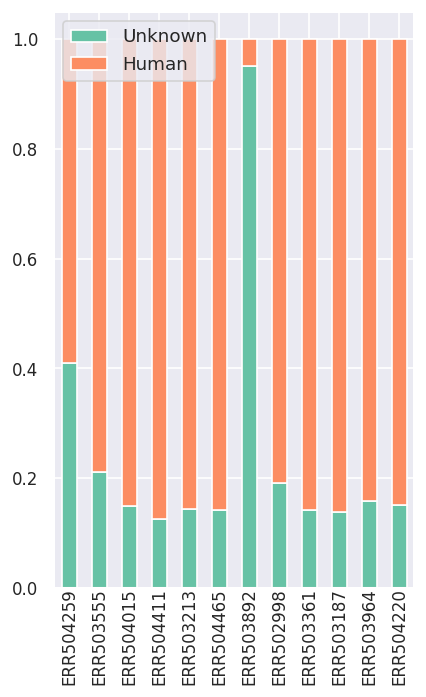

In [80]:
np.random.seed(0)
kc_res_keep = kc_results.groupby(by='Env', as_index=F).apply(lambda grp: grp.nlargest(2, 'Unknown'))
#kc_res_keep = kc_res_keep.set_index(kc_res_keep.apply(lambda x: '{}.{}'.format(x.name[1], x['Env']), axis=1))
kc_res_keep = kc_res_keep.set_index(kc_res_keep.apply(lambda x: x.name[1], axis=1))
print(kc_res_keep.index.tolist())
kc_res_keep = kc_res_keep.rename(columns=lambda x: 'Skin-Others' if x == 'Skin' else x)
kc_res_keep['Human'] = kc_res_keep[['Foot', 'Hand', 'Nose', 'Skin-Others']].sum(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(3, 6), dpi=120)
ax.tick_params('x', labelsize=10, direction='in', pad=0.01)
kc_res_keep.loc[:, ['Unknown', 'Human']].plot(kind='bar', stacked=T, ax=ax, fontsize=10)
ax.legend(loc='upper left')
plt.subplots_adjust(top=1, bottom=0.2, left=0, right=1, hspace=0, wspace=0)
plt.savefig('Contamination.png')
plt.savefig('Contamination.svg')
plt.savefig('Contamination.pdf')

In [45]:
[['ERR503379.Kitchen_Light_Switch', 'ERR504349.Kitchen_Light_Switch', 'ERR503084.Kitchen_Floor', 'ERR503000.Kitchen_Floor',
  'ERR504354.Kitchen_Counter', 'ERR503986.Front_Door_Knob',], 
                ['Foot', 'Hand', 'Nose', 'Skin-Others', 'Unknown']]

[['ERR503379.Kitchen_Light_Switch',
  'ERR504349.Kitchen_Light_Switch',
  'ERR503084.Kitchen_Floor',
  'ERR503000.Kitchen_Floor',
  'ERR504354.Kitchen_Counter',
  'ERR503986.Front_Door_Knob'],
 ['Foot', 'Hand', 'Nose', 'Skin-Others', 'Unknown']]